##Instalación Tesseract

In [1]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [2]:
!pip install pytesseract

In [3]:
!tesseract -v

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


### Primer testeo
[Imágen input](https://www.google.com/search?q=pishing+email+screenshot&sca_esv=d607b7a43a2125f2&udm=2&biw=1307&bih=587&sxsrf=AHTn8zpBVkCppfm6Nu-h2Ou0c3yE4sY1wg%3A1739871277563&ei=LVS0Z-f5IffUkdUP87yNoA4&ved=0ahUKEwinxNDL9cyLAxV3aqQEHXNeA-QQ4dUDCBE&uact=5&oq=pishing+email+screenshot&gs_lp=EgNpbWciGHBpc2hpbmcgZW1haWwgc2NyZWVuc2hvdEiKEFAAWJIOcAB4AJABAJgBYaAB8gmqAQIxNLgBA8gBAPgBAZgCA6ACmQLCAggQABgTGAcYHsICChAAGBMYBxgKGB7CAgYQABgHGB6YAwCSBwMyLjGgB9EP&sclient=img#vhid=8WjBUxiFFtU_aM&vssid=mosaic): email fraudulento de PayPal

In [4]:
import pytesseract
from PIL import Image

# Cargar imagen
image_path = "test.png"
image = Image.open(image_path)

# Extraer texto con OCR
text = pytesseract.image_to_string(image)

print(text)


 

 

Your PayPal Access Blocked ! 6 fo

PayPal <paypalaccounts@mailbox.com> Unsubscribe Feb 17, 2019, 4:50 PM *& a :
tome v

Your PayPal Account is Limited,
Solve in 24 Hours!

Dear PayPal Customer,

We're sorry to say you cannot access all the paypal account features like payment and money transfer.
Click here to fix your account now. .

Why is it blocked?
Because we think your account is in danger of theft and unauthorized uses.

How can | fix the problem?
Confirm all your details on our server. Just click below and follow all of the steps.

Confirm Account Details Now

 

 



In [5]:
!echo "test.png" | tesseract stdin stdout


Page 0 : test.png
Estimating resolution as 244
 

 

Your PayPal Access Blocked ! 6 fo

PayPal <paypalaccounts@mailbox.com> Unsubscribe Feb 17, 2019, 4:50 PM *& a :
tome v

Your PayPal Account is Limited,
Solve in 24 Hours!

Dear PayPal Customer,

We're sorry to say you cannot access all the paypal account features like payment and money transfer.
Click here to fix your account now. .

Why is it blocked?
Because we think your account is in danger of theft and unauthorized uses.

How can | fix the problem?
Confirm all your details on our server. Just click below and follow all of the steps.

Confirm Account Details Now

 

 


In [8]:
!which tesseract


/usr/bin/tesseract


## Integración con NLP

In [6]:
!pip install spacy
!pip install transformers

In [74]:
import re
import pytesseract
import spacy
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

nlp = spacy.load("en_core_web_sm")

def extract_text_from_image(image_path):
    """Extrae texto de la imagen"""
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

def extract_info_with_nlp(text):
    """Usa NLP para extraer emails, links y datos sensibles."""
    doc = nlp(text)

    email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"
    emails = re.findall(email_pattern, text)
    email_domains = [email.split('@')[1] for email in emails]

    link_pattern = r'(https?://[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[^ \n]*)?|www\.[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[^ \n]*)?|[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[^ \n]*)?)'
    links = re.findall(link_pattern, text)
    valid_links = [link for link in links if not any(domain in link for domain in email_domains)]

    keywords_list = ['urgent', 'verification', 'invoice', 'help', 'need', 'suspicious', 'important', 'password', 'required', 'action',
                      'vulnerability', 'danger', 'details', 'payment',
                      'message', 'file', 'request', 'document', 'invoice', 'account', 'risk', 'bill', 'billing', 'information', 'credit', 'card', 'charges',
                      'unwanted', 'suspended', 'transactions', 'immediately', 'username', 'password', 'verify', 'verified', 'address']
    keywords = [keyword for keyword in keywords_list if keyword in text.lower()]

    phone_pattern = r'(\+?\d{1,2}\s?)?(\(?\d{1,4}\)?\s?[\d\s\-]{7,})'
    phones = re.findall(phone_pattern, text)

    card_pattern = r'\b\d{4}[-\s]?\d{4}[-\s]?\d{4}[-\s]?\d{4}\b'
    cards = re.findall(card_pattern, text)

    return {
        "emails": emails,
        "links": valid_links,
        "phones": phones,
        "cards": cards,
        "keywords": keywords,
        "raw_text": text
    }


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [54]:
image_path = "test.png"
text_extracted = extract_text_from_image(image_path)
structured_info = extract_info_with_nlp(text_extracted)

print("\n Texto extraído", text_extracted)
print("\n Texto estructurado:\n", structured_info)


 Texto extraído  

 

Your PayPal Access Blocked ! 6 fo

PayPal <paypalaccounts@mailbox.com> Unsubscribe Feb 17, 2019, 4:50 PM *& a :
tome v

Your PayPal Account is Limited,
Solve in 24 Hours!

Dear PayPal Customer,

We're sorry to say you cannot access all the paypal account features like payment and money transfer.
Click here to fix your account now. .

Why is it blocked?
Because we think your account is in danger of theft and unauthorized uses.

How can | fix the problem?
Confirm all your details on our server. Just click below and follow all of the steps.

Confirm Account Details Now

 

 


 Texto estructurado:
 {'emails': ['paypalaccounts@mailbox.com'], 'links': [], 'phones': [], 'cards': [], 'keywords': ['danger', 'details', 'payment'], 'raw_text': " \n\n \n\nYour PayPal Access Blocked ! 6 fo\n\nPayPal <paypalaccounts@mailbox.com> Unsubscribe Feb 17, 2019, 4:50 PM *& a :\ntome v\n\nYour PayPal Account is Limited,\nSolve in 24 Hours!\n\nDear PayPal Customer,\n\nWe're sorry to s

In [55]:
image_path = "sms_test1.png"
text_extracted = extract_text_from_image(image_path)
structured_info = extract_info_with_nlp(text_extracted)

print("\n Texto extraído", text_extracted)
print("\n Texto estructurado:\n", structured_info)


 Texto extraído    

0 AT&T 4G 3:50 PM ad

< Messages (1) +1 (202) 609-0301 Details

Toxt
Today 3:40 PN

 

Investigation Division) LR.S is
filing lawsuit against you, for
more information call on +1
7038798780 on urgent basis,
Otherwise your arrest warrant
will be forwarded to your local
police department and your
property and bank accounts and
social benifits will be frozen by
government.

 

 

a Send


 Texto estructurado:
 {'emails': [], 'links': [], 'phones': [('+1 ', '(202) 609-0301 '), ('+1\n', '7038798780 ')], 'cards': [], 'keywords': ['urgent', 'details'], 'raw_text': '   \n\n0 AT&T 4G 3:50 PM ad\n\n< Messages (1) +1 (202) 609-0301 Details\n\nToxt\nToday 3:40 PN\n\n \n\nWARNING:(Criminal\nInvestigation Division) LR.S is\nfiling lawsuit against you, for\nmore information call on +1\n7038798780 on urgent basis,\nOtherwise your arrest warrant\nwill be forwarded to your local\npolice department and your\nproperty and bank accounts and\nsocial benifits will be frozen by\ngovernm

In [56]:
image_path = "sms_test2.png"
text_extracted = extract_text_from_image(image_path)
structured_info = extract_info_with_nlp(text_extracted)

print("\n Texto extraído", text_extracted)
print("\n Texto estructurado:\n", structured_info)


 Texto extraído  

   

+1 (951) 923-6938

Text Message
Mon, Jan 13, 11:16 PM

Amazon 2020 resolutions:
1) not to be greedy 2) care
more about the customers.
So you'll get $130 freebies
to do a survey mate
a2ver.info/WYmoR8tOIPS

 


 Texto estructurado:
 {'emails': [], 'links': ['a2ver.info/WYmoR8tOIPS'], 'phones': [('+1 ', '(951) 923-6938\n\n')], 'cards': [], 'keywords': [], 'raw_text': " \n\n   \n\n+1 (951) 923-6938\n\nText Message\nMon, Jan 13, 11:16 PM\n\nAmazon 2020 resolutions:\n1) not to be greedy 2) care\nmore about the customers.\nSo you'll get $130 freebies\nto do a survey mate\na2ver.info/WYmoR8tOIPS\n\n \n\x0c"}


## Evaluación

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import json

file_path ='/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/TFM/Models/OCR/Data/labels.json'

with open(file_path, 'r') as f:
    labels = json.load(f)

In [75]:
def evaluate(image_name, labels, image_path):
    """Evaluar la precisión de la extracción de texto"""
    extracted_text = extract_text_from_image(image_path)

    # Etiquetas reales
    real_emails = set(labels.get(image_name, {}).get("emails", []))
    real_links = set(labels.get(image_name, {}).get("links", []))
    real_keywords = set(labels.get(image_name, {}).get("keywords", []))
    real_phones = set(labels.get(image_name, {}).get("phones", []))
    real_cards = set(labels.get(image_name, {}).get("cards", []))

    # info con NLP
    extracted_info = extract_info_with_nlp(extracted_text)
    extracted_emails = set(extracted_info["emails"])
    extracted_links = set(extracted_info["links"])
    extracted_keywords = set(extracted_info["keywords"])
    extracted_phones = set(extracted_info["phones"])
    extracted_cards = set(extracted_info["cards"])

    # MAILS
    print(f"\nEvaluando la imagen: {image_name}")
    print(f"Etiquetas reales (emails): {real_emails}")
    print(f"Emails extraídos: {extracted_emails}")
    if real_emails or extracted_emails:
        precision_emails = len(real_emails & extracted_emails) / len(extracted_emails) if extracted_emails else 0
        recall_emails = len(real_emails & extracted_emails) / len(real_emails) if real_emails else 0
        f1_emails = (2 * precision_emails * recall_emails) / (precision_emails + recall_emails) if (precision_emails + recall_emails) > 0 else 0
    else:
        precision_emails = recall_emails = f1_emails = 1
    print(f"Precisión de emails: {precision_emails:.2f}")
    print(f"Recall de emails: {recall_emails:.2f}")
    print(f"F1-Score de emails: {f1_emails:.2f}")

    # LINKS
    print(f"Etiquetas reales (links): {real_links}")
    print(f"Links extraídos: {extracted_links}")
    if real_links or extracted_links:
        precision_links = len(real_links & extracted_links) / len(extracted_links) if extracted_links else 0
        recall_links = len(real_links & extracted_links) / len(real_links) if real_links else 0
        f1_links = (2 * precision_links * recall_links) / (precision_links + recall_links) if (precision_links + recall_links) > 0 else 0
    else:
        precision_links = recall_links = f1_links = 1
    print(f"Precisión de links: {precision_links:.2f}")
    print(f"Recall de links: {recall_links:.2f}")
    print(f"F1-Score de links: {f1_links:.2f}")

    # KEYWORDS
    print(f"Etiquetas reales (keywords): {real_keywords}")
    print(f"Keywords extraídas: {extracted_info['keywords']}")
    if real_keywords or extracted_keywords:
        precision_keywords = len(real_keywords & extracted_keywords) / len(extracted_keywords) if extracted_keywords else 0
        recall_keywords = len(real_keywords & extracted_keywords) / len(real_keywords) if real_keywords else 0
        f1_keywords = (2 * precision_keywords * recall_keywords) / (precision_keywords + recall_keywords) if (precision_keywords + recall_keywords) > 0 else 0
    else:
        precision_keywords = recall_keywords = f1_keywords = 1
    print(f"Precisión de keywords: {precision_keywords:.2f}")
    print(f"Recall de keywords: {recall_keywords:.2f}")
    print(f"F1-Score de keywords: {f1_keywords:.2f}")

    # PHONES
    print(f"Etiquetas reales (phones): {real_phones}")
    print(f"Phones extraídos: {extracted_phones}")
    if real_phones or extracted_phones:
        precision_phones = len(real_phones & extracted_phones) / len(extracted_phones) if extracted_phones else 0
        recall_phones = len(real_phones & extracted_phones) / len(real_phones) if real_phones else 0
        f1_phones = (2 * precision_phones * recall_phones) / (precision_phones + recall_phones) if (precision_phones + recall_phones) > 0 else 0
    else:
        precision_phones = recall_phones = f1_phones = 1
    print(f"Precisión de phones: {precision_phones:.2f}")
    print(f"Recall de phones: {recall_phones:.2f}")
    print(f"F1-Score de phones: {f1_phones:.2f}")

    # CARDS
    print(f"Etiquetas reales (cards): {real_cards}")
    print(f"Cards extraídas: {extracted_cards}")
    if real_cards or extracted_cards:
        precision_cards = len(real_cards & extracted_cards) / len(extracted_cards) if extracted_cards else 0
        recall_cards = len(real_cards & extracted_cards) / len(real_cards) if real_cards else 0
        f1_cards = (2 * precision_cards * recall_cards) / (precision_cards + recall_cards) if (precision_cards + recall_cards) > 0 else 0
    else:
        precision_cards = recall_cards = f1_cards = 1
    print(f"Precisión de cards: {precision_cards:.2f}")
    print(f"Recall de cards: {recall_cards:.2f}")
    print(f"F1-Score de cards: {f1_cards:.2f}")


    if real_emails != extracted_emails:
        print(f"-----ERROR en emails. Faltantes: {real_emails - extracted_emails}, Extra: {extracted_emails - real_emails}")
    if real_links != extracted_links:
        print(f"-----ERROR en links. Faltantes: {real_links - extracted_links}, Extra: {extracted_links - real_links}")
    if real_keywords != extracted_keywords:
        print(f"-----ERROR en keywords. Faltantes: {real_keywords - extracted_keywords}, Extra: {extracted_keywords - real_keywords}")
    if real_phones != extracted_phones:
        print(f"-----ERROR en phones. Faltantes: {real_phones - extracted_phones}, Extra: {extracted_phones - real_phones}")
    if real_cards != extracted_cards:
        print(f"-----ERROR en cards. Faltantes: {real_cards - extracted_cards}, Extra: {extracted_cards - real_cards}")

# Carga etiquetas
file_path ='/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/TFM/Models/OCR/Data/labels.json'
with open(file_path, 'r') as file:
    labels = json.load(file)

# Evaluación imágenes
for image_name in labels.keys():
    image_path = f"/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/TFM/Models/OCR/Data/Images/{image_name}"
    evaluate(image_name, labels, image_path)


Evaluando la imagen: image1.png
Etiquetas reales (emails): {'amazon.service@013802mail.com'}
Emails extraídos: {'amazon.service@013802mail.com'}
Precisión de emails: 1.00
Recall de emails: 1.00
F1-Score de emails: 1.00
Etiquetas reales (links): {'amazon.com'}
Links extraídos: {'Amazon.com', 'amazon.service'}
Precisión de links: 0.00
Recall de links: 0.00
F1-Score de links: 0.00
Etiquetas reales (keywords): {'action', 'suspended', 'charges', 'address', 'transactions', 'suspicious', 'account', 'username', 'verified', 'immediately', 'unwanted'}
Keywords extraídas: ['suspicious', 'action', 'account', 'bill', 'billing', 'charges', 'unwanted', 'suspended', 'transactions', 'immediately', 'verified', 'address']
Precisión de keywords: 0.83
Recall de keywords: 0.91
F1-Score de keywords: 0.87
Etiquetas reales (phones): {'555-5555'}
Phones extraídos: {('55', '5-5555\n\n')}
Precisión de phones: 0.00
Recall de phones: 0.00
F1-Score de phones: 0.00
Etiquetas reales (cards): set()
Cards extraídas: se

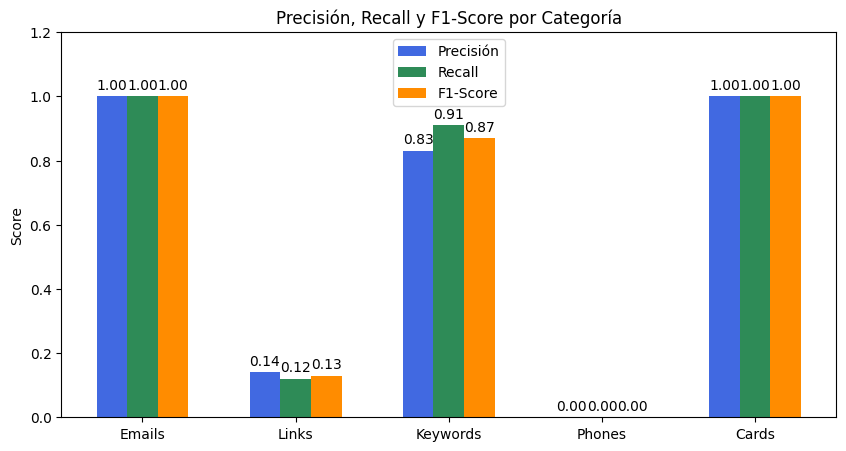

In [77]:
import matplotlib.pyplot as plt
import numpy as np

#precisión, recall y F1-score
categories = ["Emails", "Links", "Keywords", "Phones", "Cards"]
precision = [1.00, 0.14, 0.83, 0.00, 1.00]
recall = [1.00, 0.12, 0.91, 0.00, 1.00]
f1_score = [1.00, 0.13, 0.87, 0.00, 1.00]

x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))

bars1 = ax.bar(x - width, precision, width, label="Precisión", color="royalblue")
bars2 = ax.bar(x, recall, width, label="Recall", color="seagreen")
bars3 = ax.bar(x + width, f1_score, width, label="F1-Score", color="darkorange")

ax.set_ylabel("Score")
ax.set_title("Precisión, Recall y F1-Score por Categoría")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.ylim(0, 1.2)
plt.show()
